<a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons Licence" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/88x31.png" /></a><br /><span xmlns:dct="http://purl.org/dc/terms/" property="dct:title">COMP3611M - Bayesian Linear Regression</span> by <span xmlns:cc="http://creativecommons.org/ns#" property="cc:attributionName">Marc de Kamps and University of Leeds</span> is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International License</a>.

## Bayesian Linear Regression

We briefly recapitulate the formulae for Bayesian Linear regression. 

In Bayesian linear regression, again we want to describe our data with a deterministic polynomial, whose coefficients we want to determine from the data. In line with the Bayesian approach, we define a prior probability distribution over our weights. In line with an assumption of Gaussian distributed noise, we assume a Gaussian
prior:
$$
p(\boldsymbol{w}) = \mathcal{N}(\boldsymbol{w} \mid 0, \alpha^{-1}\mathbb{1}),
$$
that is: we centre our weights on zero and allow a single parameter to set the variance in each dimension. In the absence of further knowledge about the data, this is a reasonable choice.

The posterior distribution is Gaussian again (we give the derivation elsewhere):
$$
p(\boldsymbol{w} \mid \mathcal{D} ) = \mathcal{N}(\boldsymbol{w} \mid \boldsymbol{m}_N, \boldsymbol{S}_N)
$$
Here $\mathcal{D}$ is shorthand for the dataset $\boldsymbol{X}, \boldsymbol{t}$, where
$$
\boldsymbol{X} = \left\{ \boldsymbol{x}_1, \cdots, \boldsymbol{x}_N \right\} 
$$
and
$$
\boldsymbol{t} = \left\{ \boldsymbol{t}_1, \cdots, \boldsymbol{t}_N \right\},
$$
where $\boldsymbol{t}_i$ is the observed value associated with $\boldsymbol{x}_i$, the value that our fit should
reproduce as closely as possible.

We see that the posterior distribution is again a Gaussian, with a mean $\boldsymbol{m}_N, \boldsymbol{S}_N$ given by:
\begin{align}
\boldsymbol{m}_N & =  \boldsymbol{S}_{N}(\boldsymbol{S}^{-1}_0 \boldsymbol{m}_0 +\beta \boldsymbol{\Phi}^T \boldsymbol{t}) \\
\boldsymbol{S}_N & =  \boldsymbol{S}^{-1}_0 + \beta \boldsymbol{\Phi}^T \boldsymbol{\Phi}
\end{align}

Here $\Phi$ is again the design matrix. $\boldsymbol{t}$ are the target values of the data set. $\alpha$ is
a parameter which represents our prior. This value reflects the *subjective belief* about the weights prior to the data, so it must be chosen by us. If we chose it large, then this reflects a belief that the weights will be small. If we are not certain about this, we should pick a smaller value resulting in a broader prior. 




We assume that $\beta$ is known. If it is not, the likelihood function and prior become more complex than Gaussians, something we will for now ignore, although estimating $\beta$ from the data is certainly possible. We happen to know that $\beta = 1$, and will use that  value here.




There are at least two possible ways of using these formulae.
1. *Batch learning*. Here we consider $\boldsymbol{m}_0, \boldsymbol{S}_0$ a prior, and the matrix $\Phi$ is constructed using the entire data set. A conventional choice is then:
$$
p(\boldsymbol{w} \mid \alpha) = \mathcal{N}(\boldsymbol{w} \mid \boldsymbol{0}, \alpha^{-1} \boldsymbol{I})
$$
The formulae simplify somewhat in this case:
\begin{align}
\boldsymbol{m}_N & =  \beta \boldsymbol{S}_{N} \boldsymbol{\Phi}^T \boldsymbol{t} \\
\boldsymbol{S}_N & =  \alpha\boldsymbol{I} + \beta \boldsymbol{\Phi}^T \boldsymbol{\Phi}
\end{align}




2. *Sequential learning*. We may again start with the following prior:
$$
p(\boldsymbol{w} \mid \alpha) = \mathcal{N}(\boldsymbol{w} \mid \boldsymbol{0}, \alpha^{-1} \boldsymbol{I}),
$$
i.e. $\boldsymbol{m}_0 = \boldsymbol{0}$ and $\boldsymbol{S}_0 = \alpha^{-1} \boldsymbol{I}$.

and construct $\Phi$ from data that has just been acquired (which may be a single data point). We then
calculate the $N$-th step according to:
\begin{align}
\boldsymbol{m}_N & =  \boldsymbol{S}_{N}(\boldsymbol{S}^{-1}_{N-1} \boldsymbol{m}_{N-1} +\beta \boldsymbol{\Phi}^T \boldsymbol{t}) \\
\boldsymbol{S}_N & =  \boldsymbol{S}^{-1}_{N-1} + \beta \boldsymbol{\Phi}^T \boldsymbol{\Phi}
\end{align}

Below, we will give examples of both approaches, starting with batch learning.

### Interpretation of Bayesian linear regression

#### The predictive distribution
The MLE estimate itself is a point value. In weight space it corresponds to a single point. In data space, this is
a distribution, since we model the data with a predictive distribution:
$$
 \mathcal{N}(t \mid \boldsymbol{w}^T \boldsymbol{\phi}(x), \beta^{-1}),
$$
where we have assumed that the precision of the noise, $\beta = 1.0$.
For each value of $x$, the MLE determines a distribution that peaks around the value 
$\boldsymbol{w}^T \boldsymbol{\phi}(x)$.

Let us recapitulate the MLE estimate for a linear relationship.



In [1]:
import numpy as  np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 200

with open('linnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]


Phi = np.array([np.power(xs,0),np.power(xs,1)]).T # for every degree of the polynomial we add a column to the design matrix
Phi_dagger = np.linalg.inv(Phi.T.dot(Phi)).dot(Phi.T)
w = Phi_dagger.dot(t)
print(w)

[-0.70176791  0.28951715]


The values above give 'the best fitting line', both according to the criterion of a minimal sum of squared
residues and the MLE of the likelihood. The predictive distribution is given by
$$
 \mathcal{N}(t \mid \ w_0 + w_1x, 1.0),
$$
We visualize this distribution as a heatplot, together with the original data.


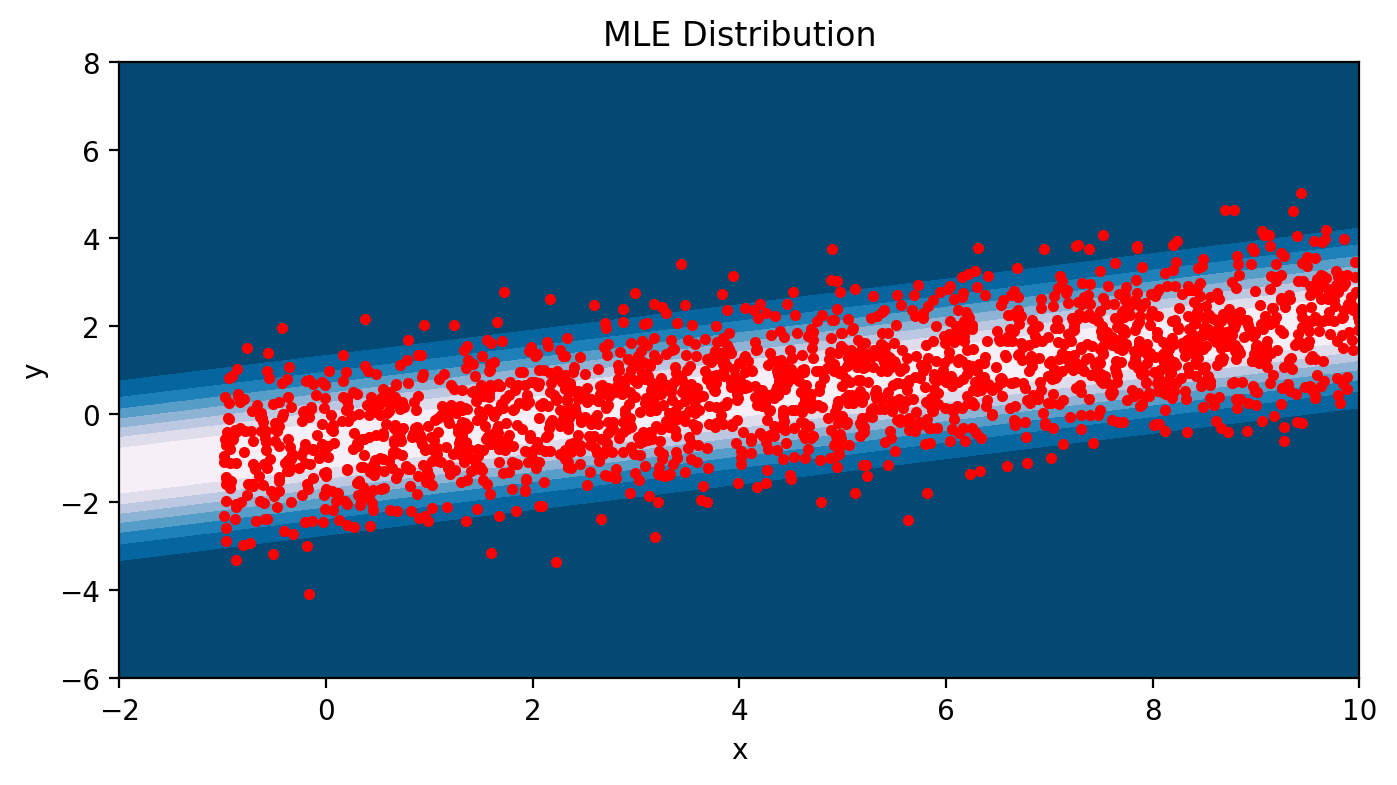

In [2]:
import scipy.stats as st
from matplotlib import colors, ticker, cm

N_mesh = 100
x = np.linspace( -2.0, 10.0, N_mesh)
y = np.linspace(-6.0,  8.0, N_mesh)

X, Y = np.meshgrid(x, y)


z = st.norm.pdf(Y, (w[0]+ w[1]*X), 1.0)
fig, ax = plt.subplots()
cs = ax.contourf(X, Y, z, cmap=cm.PuBu_r)
plt.plot(xs,t,'r.')
plt.title('MLE Distribution')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('mle.pdf')


#### The Posterior Distribution
The posterior distribution is not a single point like the MLE, but a distribution. We will show that the peak of this distribution  usually is close to the MLE esitimate.  Some degree of numerical discrepency is expected because the Bayesian maximum depends on our choice of prior. But the posterior distribution is not a  single point in weight space: it is a distribution in weight space. As such it is a distribution of distributions.

The differences between the MLE are more pronounced when not much data is available. We will first demonstrate the posterior obtained from a relatively small number of data points.


In [3]:
import numpy as np

with open('linnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]

    # do the regression on 10 points

n_points = 10
xres=xs[:n_points]
tres=t[:n_points]
n_degree = 2
Phi = np.array([np.power(xres,i) for i in range(n_degree)]).T

Diag=np.zeros(n_degree*n_degree)
Diag.shape = n_degree, n_degree

alpha = 10.
np.fill_diagonal(Diag,alpha)
beta = 1.0
S_n = np.linalg.inv(Diag + beta*Phi.T.dot(Phi))
m_n = beta*S_n.dot(Phi.T.dot(tres))

print(m_n)
print(S_n)

[-0.22714336  0.25428089]
[[ 0.08305759 -0.01055076]
 [-0.01055076  0.00336741]]


The first two values are the posterior mean. The four values underneath are the posterior covariance. The posterior distribution is shown below. 

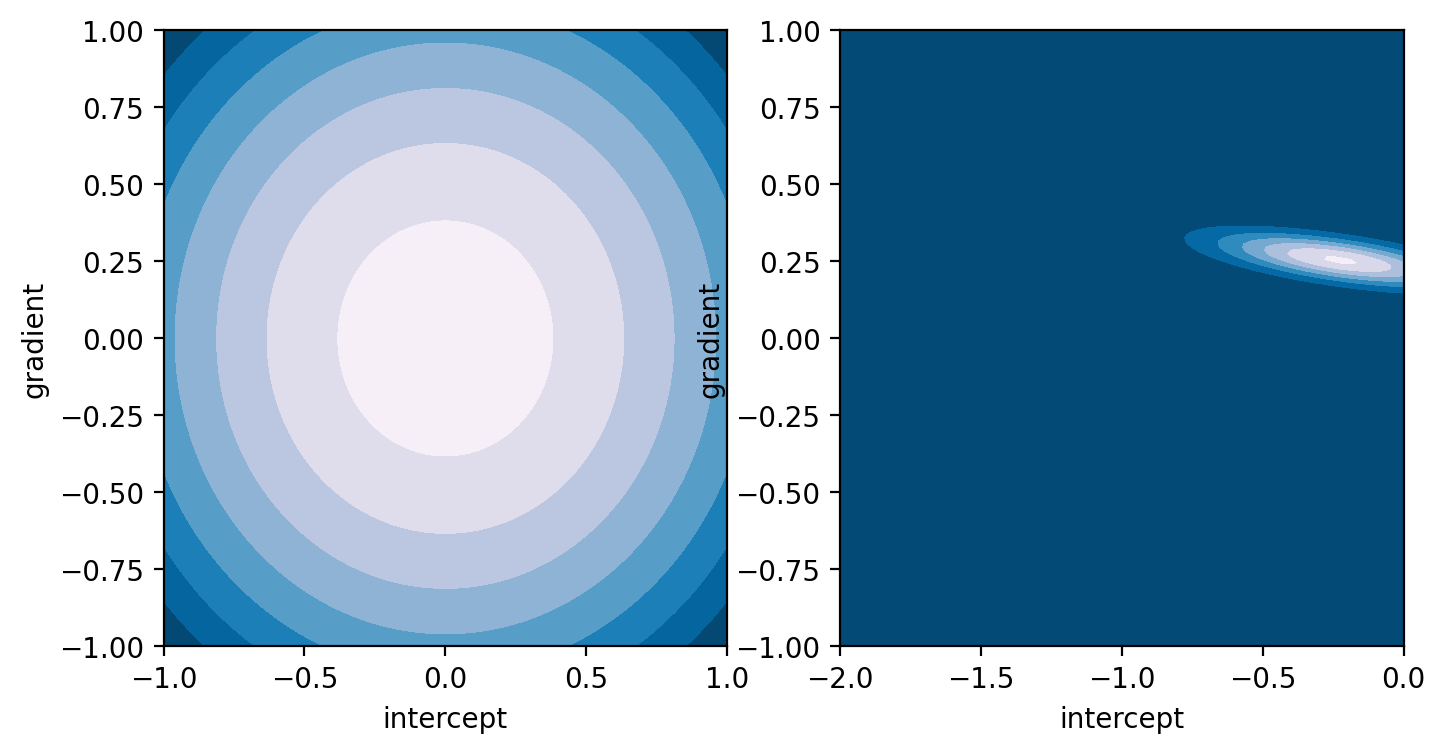

In [4]:
import scipy
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi']     = 200


def show2DNormal(ax,mu, cov, boundary = [[-1.,1.],[-1.,1]],  N_mesh = 200, xlabel="", ylabel=""):
    x=np.linspace(boundary[0][0], boundary[0][1],N_mesh)
    y=np.linspace(boundary[1][0], boundary[1][1],N_mesh)
    X, Y = np.meshgrid(x, y)
    pos = np.dstack((X, Y))
    rv = scipy.stats.multivariate_normal(mu,cov)
    cs = ax.contourf(X, Y, rv.pdf(pos), cmap=cm.PuBu_r) 
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)    

fig, (ax1, ax2) = plt.subplots(1, 2)
m_0 = [0.,0.]
S_0 = Diag
show2DNormal(ax1, m_0,S_0, xlabel="intercept", ylabel="gradient")
show2DNormal(ax2, m_n,S_n, boundary = [[-2,0],[-1,1]], xlabel="intercept",ylabel="gradient")

plt.savefig('bayesregress.pdf')


After 10 points, parameter $w_0$ has considerable uncertains, whereas parameter $w_1$ has been much more contstrained.

In order to visualise the posterior distribution, we can sample from it. The $\boldsymbol{w}$ values thus sampled each represent a linear relationship. Remember that each $\boldsymbol{w}$ represents an entire probability distribution. By plotting the linear relationships we represent each distribution by its peak value. We see
that the gradients of the lines are better constrained than the intercepts, something that is also clear from
the posterior distribution itself.

We have an example here of *model uncertainty*, an uncertainty in the model parameters. This comes on top of the noise that is intrinsinc in the data, which is modelled by the covariance matrix, and which in the case of the MLE shown above was visible as a zone around the mean.

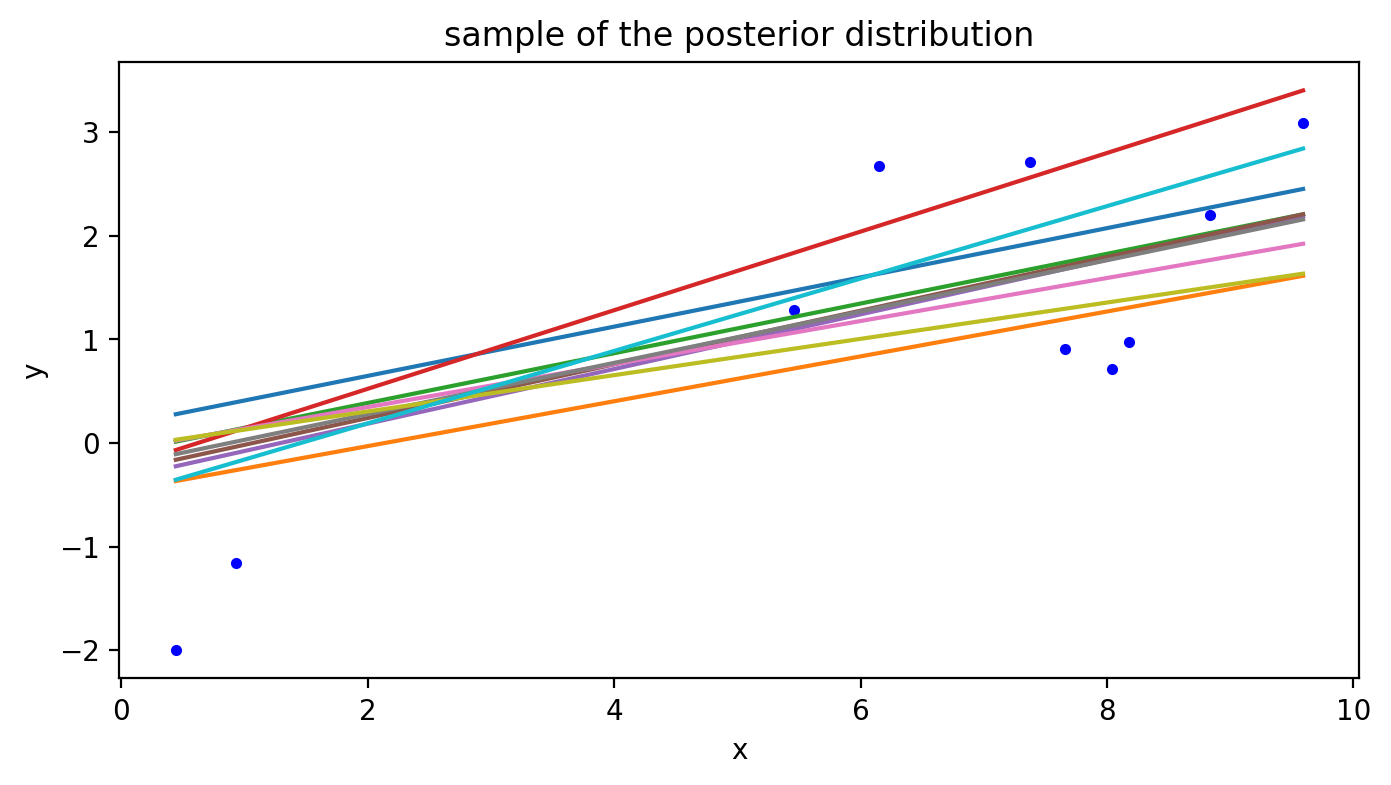

In [5]:
sample=np.random.multivariate_normal(m_n,S_n,size=100000)

x_min = np.min(xres)
x_max = np.max(xres)

plt.plot(xres,tres,'b.')
for s in sample[:10]:
    x_fit = np.linspace(x_min,x_max,100)
    y_fit = s[1]*x_fit + s[0]
    plt.plot(x_fit,y_fit,'-') 

plt.xlabel('x')
plt.ylabel('y')
plt.title('sample of the posterior distribution')
plt.savefig('postsample.pdf')



After 100 points, the model uncertainty is much reduced and the mean starts to agree with the MLE.

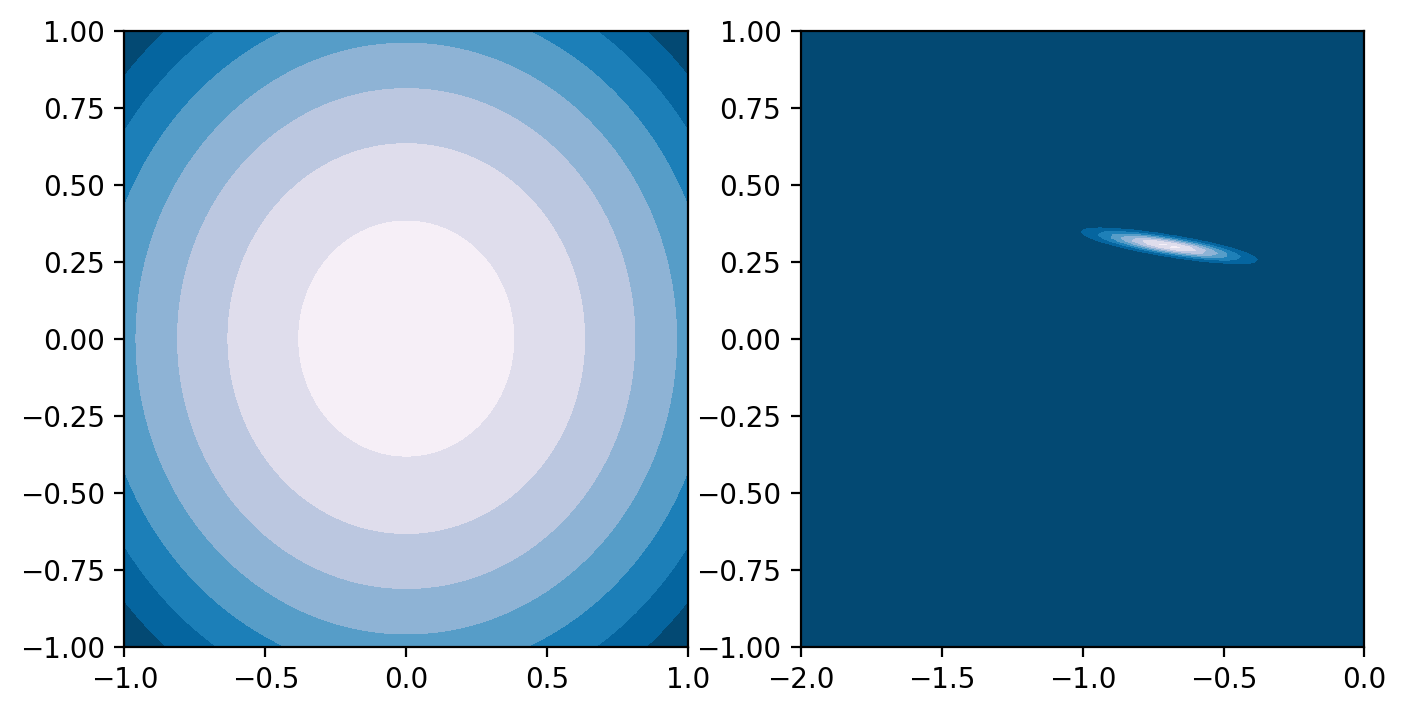

In [6]:
plt.rcParams['figure.figsize'] = [8,4]
n_points = 100
xres=xs[:n_points]
tres=t[:n_points]
n_degree = 2
Phi = np.array([np.power(xres,i) for i in range(n_degree)]).T

Diag=np.zeros(n_degree*n_degree)
Diag.shape = n_degree, n_degree

alpha = 10.
np.fill_diagonal(Diag,alpha)
beta = 1.0
S_n = np.linalg.inv(Diag + beta*Phi.T.dot(Phi))
m_n = beta*S_n.dot(Phi.T.dot(tres))


fig, (ax1, ax2) = plt.subplots(1, 2)
show2DNormal(ax1,m_0,S_0)
show2DNormal(ax2,m_n,S_n, boundary = [[-2,0],[-1,1]])




Below the serial version of the algorithm is implemented. You can modify the number of iterations.

In [7]:
%matplotlib inline
from ipywidgets import interactive

plt.rcParams['figure.figsize'] = [4,4]

with open('linnoise.dat') as f:
    lines = f.readlines()
    xs = [float(x.split(',')[0]) for x in lines]
    t  = [float(y.split(',')[1]) for y in lines]

beta = 1.0

n_degree = 2 # linear relation for fit
Diag=np.zeros(n_degree*n_degree)
Diag.shape = n_degree, n_degree
alpha = 10.
np.fill_diagonal(Diag,alpha)
m_0 = [0.,0.]
s_0 = Diag

def regressSinglePoint(prior, data, beta):
    # prior is compatible with an iterable of two elements, containing mean and covariance
    # data is compatible with an iterable of two elements, x and t. 
    xs = [data[0]]
    t  = [data[1]]
    
    Phi = np.array([np.power(xs,0),np.power(xs,1)]).T
    m_0 = prior[0]
    s_0 = prior[1]
    
    s_0_inv = np.linalg.inv(s_0)
    
    s_n_inv = s_0_inv + beta*Phi.T.dot(Phi)
    s_n = np.linalg.inv(s_n_inv)
    m_n = s_n.dot(s_0_inv.dot(m_0) + beta*Phi.T.dot(t))
    
    return m_n, s_n

def applySequentialRegression(N_iter):
    m_i = np.array(m_0)
    s_i = np.array(s_0)
    fig, ax = plt.subplots()
    for i in range(N_iter):
        m_n, s_n = regressSinglePoint([m_i,s_i],[xs[i],t[i]], beta)
        m_i = np.array(m_n)
        s_i = np.array(s_n)
    show2DNormal(ax,m_i,s_i)
    return m_i, s_i

interactive_plot = interactive(applySequentialRegression, N_iter=(0, 2000))
interactive_plot



interactive(children=(IntSlider(value=1000, description='N_iter', max=2000), Output()), _dom_classes=('widget-…

### Pros and cons of Bayesian Regression

#### Predictive Distribution and Maximum a Posteriori
Using the MLE of the weights is simple. Once the optimal weights have been obtained, the are inserted in the polynomial. Using the regression results for prediction is as simple as inserting a new $x$ value in the polynomial and obtain the corresponding $y$ value, which is the prediction for this $x$.

To properly use the posterior distribution of weights, one would have to calculate the weighted exepctation with respect to the posterior distribution values over all weights:
$$
t = \int p(w \mid \boldsymbol{X}, \boldsymbol{t}) \boldsymbol{w}^T \boldsymbol{\phi}(x) dw
$$
A simple estimate would probably be to generate a number of samples of the posterior distribution as we've done above, where we sampled 10 linear relationships. We can than average the predictions made by each of these lines as an estimated of the *predictive distribution*.

In many cases this is huge overkill. If the idea is to use regression to get an approximate prediction, it is not necessary to use the posterior distribution. Sometimes a good compromise can be to use its maximum. In this particular case this would be given by the value of $\boldsymbol{m}_N$.  This is called the *maximum a posteriori* or *MAP*. Often a reasonable compromise, using the MAP is not entirely without risks, see for example section 5.2.1.2 of Murphy (2012).

In other cases, where little data is available and the penalty on a wrong decision based on MLE is severe it is better to accept the extra cost of the predictive distribution. In Unit 4 we will consider the case of determining whether a given point is an outlier. Such a decision may have financial or even legal consequences and here the importance of a principled estimate may outweigh the cost associated with evaluating the predictive distribution.


#### Regularisation

Bayesian models are far less prone to overfitting than MLE estimates, when applied consistently. The dicussion for why this is the case becomes rather technical, but when two models explain the data adequately, the Bayesian approach favours the model with a smaller number of parameters.  This important aspect of Bayesian models is discussed in Section 3.4 and 3.5 of Bishop, but requires that you have digested most of the material earlier in Chapter 3 which goes into greater detail than we can do here.

We have seen that the Bayesian approach gives a posterior distribution of weights:
$$
p(\boldsymbol{w} \mid \boldsymbol{t} ) = \mathcal{N} ( \boldsymbol{w} \mid \boldsymbol{m}_N, \boldsymbol{S}_N),
$$
where you have derived the formulae for $\boldsymbol{m}_{N}, \boldsymbol{S}_N$. You should be able to verify that:
$$
\ln p(\boldsymbol{w} \mid \boldsymbol{t} ) = -\frac{\beta}{2} \sum^N_{i=1} \left\{ t_i - \boldsymbol{w}^T\boldsymbol{\phi}(x_i) \right\}^2  - \frac{\alpha}{2} \boldsymbol{w}^T \boldsymbol{w} + \mbox{const}
$$ 

Maximising the likelihood is equivalent to maximising the log likelihood, which in turn is equivalent to minimising
the quantity:
$$
L = \sum^N_{i=1} \left\{ t_i - \boldsymbol{w}^T\boldsymbol{\phi}(x_i) \right\}^2  + \frac{\alpha}{2\beta} \boldsymbol{w}^T \boldsymbol{w} 
$$
The first term is a sum of squares, which also emerges in least squares. The second term effectively is a penalty term for large weights. This is called a *regularisation* term, as it puts constraints on the magnitude of the weights. A perfect fit which reduces the first term can still be spoilt if the weights to achieve it attain large values and in the earlier examples we saw this exactly what happens when we overfit a simple dataset.

$L$ is sometimes called a *loss function* (for training purposes - not to be confused with a prediction loss, see the discussion in Section 1.5.5. of Bishop (2006)). Minimising it can be seen as an optimisation problem. In this unit we have achieved minimisation by analytic means, but in the following units we will often see loss functions that we have to minimise using numerical methods.

Modern neural network frameworks often allow the definition of models and an independent specification of loss
functions. The *mean squared error* is a choice that is often made:
$$
\mbox{MSE} = \frac{1}{N}\sum^N_{i=1}(y_i - t_i)^2,
$$
and given the discussion so far it is not hard to see why it is an obvious choice, although it is by no means the only  and often not the best one. Statisticians use a slighly different definition that incorporates the number of parameters.

Neural network frameworks also often the possibility for different forms of regularisation. The research into Bayesian neural networks is in its infancy (see ... for a recent review), but regularisation offers some protection to overfitting.

### A more complex example

In this notebook we have assumed that the variance is known and given. If it is not known and you have to infer the variance and the mean simultaneously from the data, you can still do that. Instead of variance, we usually use precision:
$$
\lambda = \frac{1}{\sigma}
$$

The prior is then given as a normal-gamma distribution:
$$
p(\mu, \lambda) = \mathcal{N}( \mu \mid \mu_0, (\beta \lambda)^{-1}) \mbox{Gam}(\lambda \mid a, b)
$$
where 
$$
\mbox{Gam}(\lambda \mid a, b)  = \frac{1}{\Gamma(a)} b^a \lambda^{a-1} \exp (-b \lambda)
$$

Why this is a conjugate prior for the  Gaussian with both precision and mean unknown is described in Bishop (2006) and is relatively technical. However, if someone tell you that is the the conjugate prior of a likelihood with precision and mean unknown, numpy and scipy allow you to set up inference for precison and mean with relative ease.


**Exercise 1**
Now study the Bayesian linear regression example at:
https://scikit-learn.org/stable/auto_examples/linear_model/plot_bayesian_ridge.html

Consider the following questions, which you should discuss with the lab assistance:
- The example mentions that the Bayesian regression shifts the weights slightly to 0 compared to standard linear regression. Explain why this is the case.
- Is this a good thing? Discuss.
- In what way does the Bayesian fit respond to inappropriate use for prediction?


**Exercise 2**

In the example above, the gradient was more constrained than the intercept. Is that a general feature of Bayesian regression, or is this a feature of this particular dataset?
Try to develop a dataset that shows an intercept that is more constrained than the gradient.